# Introduction

The previous notebook shared some iterative processes. What became clear was that some feature engineering and hyperparameter optimization maxes out at 77% To bring the accuracy score, the next step is to go feature by feature and clean up the data to produce better results from what exists currently. 

In [16]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
data         = pd.read_csv('train_features.csv')
feature_info = pd.read_csv('train_labels.csv')
X_val        = pd.read_csv('test_features.csv')
sample_submi = pd.read_csv('sample_submission.csv')

data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
X = data.copy()
y = feature_info['status_group']

In [8]:
numeric = X.select_dtypes('number').copy()
numeric.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0


In [13]:
numeric.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [19]:
print(numeric.info(),'\n')
print("Null Values")
print(numeric.isnull().sum(),'\n')
for column in numeric.columns:
    print(column+': ', numeric[column].nunique() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
id                   59400 non-null int64
amount_tsh           59400 non-null float64
gps_height           59400 non-null int64
longitude            59400 non-null float64
latitude             59400 non-null float64
num_private          59400 non-null int64
region_code          59400 non-null int64
district_code        59400 non-null int64
population           59400 non-null int64
construction_year    59400 non-null int64
dtypes: float64(3), int64(7)
memory usage: 4.5 MB
None 

Null Values
id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64 

id:  59400
amount_tsh:  98
gps_height:  2428
longitude:  57516
latitude:  57517
num_private:  65
region_code:  27
district_code:  20
population:  1049


I may not have any null values in the numeric features, but I certainly have some garbage values. It appears from the information above that the majority of these garbage values are in the form of minimums. 

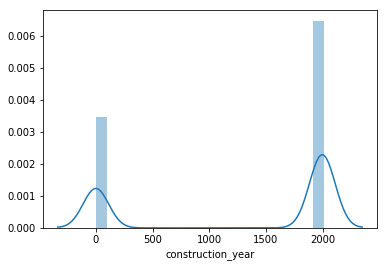

In [18]:
# Construction Year
sns.distplot(numeric['construction_year']);

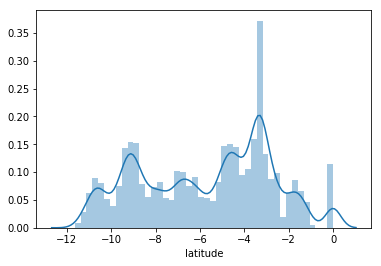

In [20]:
sns.distplot(numeric['latitude']);

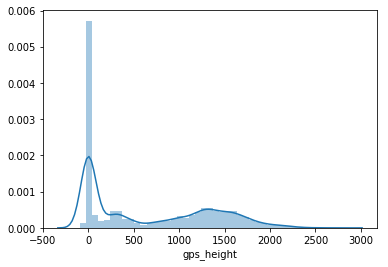

In [22]:
sns.distplot(numeric['gps_height']);

In [24]:
numeric = numeric.replace(0,np.nan)

In [28]:
numeric.loc[numeric['latitude'] == -2.000000e-08].shape

(1812, 10)

In [30]:
numeric.shape

(59400, 10)

In [35]:
numeric.isnull().sum()

id                       1
amount_tsh           41639
gps_height           20438
longitude             1812
latitude              1812
num_private          58643
region_code              0
district_code           23
population           21381
construction_year    20709
dtype: int64

In [33]:
numeric['num_private'].unique()

array([      nan, 3.900e+01, 5.000e+00, 4.500e+01, 6.000e+00, 3.000e+00,
       6.980e+02, 3.200e+01, 1.500e+01, 7.000e+00, 2.500e+01, 1.020e+02,
       1.000e+00, 9.300e+01, 1.400e+01, 3.400e+01, 1.200e+02, 1.700e+01,
       2.130e+02, 4.700e+01, 8.000e+00, 4.100e+01, 8.000e+01, 1.410e+02,
       2.000e+01, 3.500e+01, 1.310e+02, 4.000e+00, 2.200e+01, 1.100e+01,
       8.700e+01, 6.100e+01, 6.500e+01, 1.360e+02, 2.000e+00, 1.800e+02,
       3.800e+01, 6.200e+01, 9.000e+00, 1.600e+01, 2.300e+01, 4.200e+01,
       2.400e+01, 1.200e+01, 6.680e+02, 6.720e+02, 5.800e+01, 1.500e+02,
       2.800e+02, 1.600e+02, 5.000e+01, 1.776e+03, 3.000e+01, 2.700e+01,
       1.000e+01, 9.400e+01, 2.600e+01, 4.500e+02, 2.400e+02, 7.550e+02,
       6.000e+01, 1.110e+02, 3.000e+02, 5.500e+01, 1.402e+03])

In [34]:
numeric['latitude'] = numeric['latitude'].replace(-2.000000e-08 ,np.nan)

In [49]:
numeric['latitude'].nunique()

57516

In [58]:

round(numeric['latitude'], 3).nunique()

9803

In [46]:
numeric['latitude'].values

array([-9.85632177, -2.14746569, -3.82132853, ..., -8.75043433,
       -6.37857327, -6.74746425])

In [ ]:
drop_list = ['num_private','id']

drop_null_list = ['longitude','latitude']

geo_group = ['']

Group Long/Lat by region code Then Bin 

In [ ]:
# Replacing null values with the mode of the column
train_f['construction_year'].replace({0:2010}, inplace=True)
test_f['construction_year'].replace({0:2010}, inplace=True)

# Combining train and test sets
train_objs_num = len(train_f)
dataset = pd.concat(objs=[train_f, test_f], axis=0)

# Binning longitude and latitiude
step = 20
to_bin = lambda x: np.floor(x / step) * step
dataset["latbin"] = dataset.latitude.map(to_bin)
dataset["lonbin"] = dataset.longitude.map(to_bin)

# Dropping the highest cardinality features
dataset.drop(['longitude', 'latitude', 'wpt_name'],axis=1, inplace=True)

# Ordinal encoding the combined dataset
ordinal = ce.OrdinalEncoder()
ordinal.fit(dataset)
dataset = ordinal.transform(dataset)

# The train and test sets are separated again
train_f = dataset[:train_objs_num]
test_f = dataset[train_objs_num:]

X = train_f
y = train_l['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Model being used for predictions

pipeline = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=3000,criterion = 'entropy')
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)